# Geodatenanalyse 1


## Tag 2 / Block 1 - Lösung zur Übung 6

## Datenvisualisierung in Python - Teil 2


In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Übung 1

Die Europäische Umweltagentur (EEA) hat einen Datensatz zusammengestellt, durch welchen man den Zusammenhang zwischen Energienutzung, Wirtschaftsleistung und Populationsgröße gut darstellen kann. Diese Daten sind in der Datei *EEA_dataset.csv* zusammengestellt.

- **Aufgabe 1**: Erstelle eine Punktwolke, in welcher der Zusammenhang zwischen den drei Größen gut dargestellt ist.
- **Aufgabe 2**: Markiere den weltweiten Durchschnitt für beide Achsen.
- **Aufgabe 3**: Hebe Deutschland farbig hervor.

*Hinweis*: Bitte beachtet auch die Achsenlimits für eine bedeutungsvolle Darstellung.

Datenquelle: [European Environment Agency](https://www.eea.europa.eu/data-and-maps/figures/correlation-of-per-capita-energy)

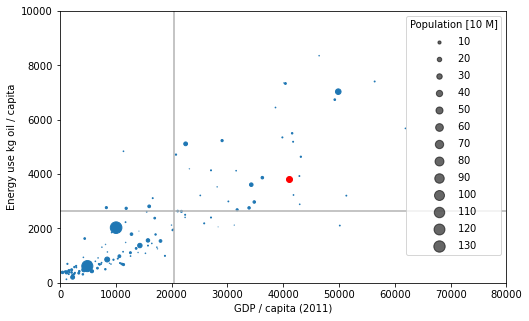

In [5]:
# Aufgabe 1-3 in einem Workflow

data = np.genfromtxt(open("datasets/EEA_dataset.csv", "rb"), delimiter=",", skip_header=1)
# print(data)

fig, ax = plt.subplots(1, figsize=(8, 5))

# was ist die Größe?
size = (data[:, 3] / 10000000)

cl = ax.scatter(data[:, 2], data[:, 1], s=size, label='Group 1')

x_avg = np.mean(data[:, 2])
y_avg = np.mean(data[:, 1])

ax.axvline(x_avg, c='0.7')
ax.axhline(y_avg, c='0.7')

# Deutschland ist Index 117
de_idx = 116
ax.plot(data[de_idx, 2], data[de_idx, 1], 'ro')

ax.set_xlabel('GDP / capita (2011)')
ax.set_ylabel('Energy use kg oil / capita')

# eine Legende für die Punktgrößen
handles, labels = cl.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Population [10 M]")

ax.set_xlim([0, 80000])
ax.set_ylim([0, 10000])

plt.show()

## Übung 2

Die Datei *FG_rainfall.csv* enthält Messungen zum Gesamtniederschlag mehrerer Jahre für die Forschungsstation Fowlers Gap im Outback (Wüste) von Australien.

- **Aufgabe 1**: Erstelle eine Karte, welche die Stationen sowie ein Raster der Niederschlagsmenge für ein Jahr zeigt.
- **Aufgabe 2**: Erstelle Kontouren, welche nach dem linearen und kubischen Verfahren erstellt wurden.
- **Aufgabe 3**: Vergleiche die Kontouren mit dem Raster aus der Aufgabe 1. Was sind hier die Probleme? Diskutiere die Vor- und Nachteile. Wie könnte man die Daten besser darstellen?

C:\Users\gabriel\anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


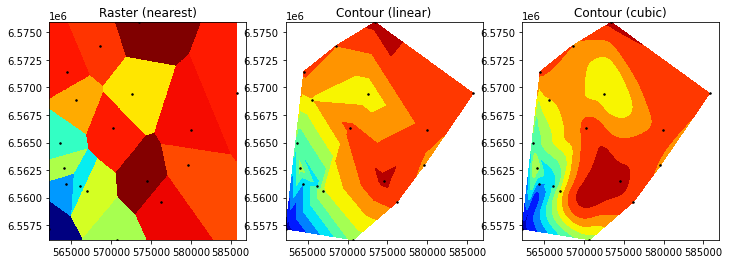

In [11]:
# Aufgabe 2

from scipy.interpolate import griddata

data = np.genfromtxt(open("datasets/FG_rainfall.csv", "rb"), delimiter=",", skip_header=1)

coords = np.vstack((data[:, 1], data[:,2])).T
grid_x, grid_y = np.mgrid[np.min(data[:, 1]):np.max(data[:, 1]):20, np.min(data[:, 2]):np.max(data[:, 2]):20]

# Das Abbildungsobjekt erstellen ...
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# nächster Nachbar
nearest = griddata(coords, data[:, 3], (grid_x, grid_y), method='nearest')

ax[0].pcolormesh(grid_x, grid_y, nearest, cmap='jet')
ax[0].plot(data[:,1], data[:,2], 'k.', ms=3)
ax[0].set_title('Raster (nearest)')

# linear interpoliert
linear = griddata(coords, data[:, 3], (grid_x, grid_y), method='linear')

ax[1].contourf(grid_x, grid_y, linear, 10, cmap='jet')
ax[1].plot(data[:,1], data[:,2], 'k.', ms=3)
ax[1].set_title('Contour (linear)')

# quadratisch interpoliert
cubic = griddata(coords, data[:, 3], (grid_x, grid_y), method='cubic')

ax[2].contourf(grid_x, grid_y, cubic, 10, cmap='jet')
ax[2].plot(data[:,1], data[:,2], 'k.', ms=3)
ax[2].set_title('Contour (cubic)')

plt.show()

## ENDE